# Million Rows Data Analysis

## Part I: Separating broad categories, Gender based behavior

Preliminaries, as usual.

In [1]:
import os
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# remove warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
# ---

pd.options.display.max_columns= 2000

%matplotlib inline

In [2]:
data=pd.read_csv("1M.csv")

In [3]:
print data.shape
data.head(10)

(1000000, 27)


,p1_liked,p2_liked,confirmed,unmatched,answeredFromTelegram,p1_id,p1_country,p1_gender,p1_education,p1_flavor,p1_age,p1_timezone,p1_ethnicity,p1_languages,p1_religiosity,p1_premium,p2_id,p2_country,p2_gender,p2_education,p2_flavor,p2_age,p2_timezone,p2_ethnicity,p2_languages,p2_religiosity,p2_premium
0,True,NaN,False,NaN,NaN,275037,US,male,college_degree,just_muslim,20.0,-5.0,{Other},"{English,Hindi,Spanish,Urdu}",1.907104,False,211070,US,female,undergraduate,NaN,19.0,-5.0,NaN,NaN,NaN,False
1,False,NaN,False,NaN,NaN,266873,CA,male,undergraduate,sunni,29.0,-4.0,"{""Arab (Levant)""}","{Arabic,English}",NaN,False,277059,CA,female,undergraduate,sunni,28.0,-4.0,"{""Arab (North Africa)""}","{Arabic,English}",2.813026,False
2,False,NaN,False,NaN,NaN,187197,US,male,college_degree,sunni,25.0,-4.0,"{""East Asian""}","{Urdu,English}",3.563876,True,109326,US,female,undergraduate,sunni,21.0,-5.0,"{""East Asian"",""South Asian""}","{Arabic,Bengali,English,Hindi,Spanish,Urdu}",4.000000,False
3,False,NaN,False,NaN,NaN,151606,US,male,graduate_degree,sunni,26.0,-5.0,"{""South Asian""}",{Bengali},3.066176,False,181761,US,female,graduate_degree,sunni,26.0,-4.0,"{""South Asian""}","{Bengali,English,Hindi,Urdu}",2.923377,False
4,False,NaN,False,NaN,NaN,266475,US,female,graduate_degree,sunni,26.0,-4.0,"{""South Asian""}",{Bengali},1.586521,False,213638,US,male,graduate_degree,NaN,NaN,-6.0,NaN,NaN,NaN,False
5,False,NaN,False,NaN,NaN,50334,US,female,college_degree,sunni,32.0,-4.0,"{""South Asian"",Other}",{Urdu},3.556575,False,276866,US,male,college_degree,sunni,28.0,-4.0,NaN,NaN,NaN,False
6,False,NaN,False,NaN,NaN,278077,US,male,graduate_degree,sunni,39.0,-6.0,"{""Arab (North Africa)""}","{French,Arabic,English}",NaN,False,273243,US,female,graduate_degree,sunni,24.0,-4.0,"{""South Asian""}","{English,Urdu}",3.067278,False
7,False,NaN,False,NaN,NaN,268366,US,male,undergraduate,just_muslim,27.0,-7.0,"{""Arab (Levant)""}",{Arabic},2.271403,True,184951,US,female,NaN,NaN,26.0,-5.0,NaN,NaN,NaN,False
8,True,NaN,False,NaN,NaN,187197,US,male,college_degree,sunni,25.0,-4.0,"{""East Asian""}","{Urdu,English}",3.563876,True,113907,CA,female,NaN,sunni,25.0,-5.0,"{""South Asian""}","{English,French,Urdu}",3.000000,False
9,False,NaN,False,NaN,NaN,276574,CA,female,college_degree,shia,NaN,-4.0,"{Other,""Arab (Levant)""}","{Arabic,English}",NaN,False,176010,US,male,graduate_degree,other,28.0,-5.0,"{""Arab (Levant)""}","{English,Arabic}",1.932605,False


### Removing useless columns

In [4]:
useless_columns=['answeredFromTelegram', 'confirmed',
                   'p1_timezone', 'p2_timezone', 'unmatched']
data.drop(useless_columns, axis=1, inplace=True)

### Handeling [p2_liked]
Since these rows are contain two sets of data, let us duplicate them, and then remerge them with main data after switching [p1\_...] and [p2\_...] data. That will make [p2_liked] useless and we will delete it.

In [5]:
datap2=data[data.p2_liked>=0]
print datap2.shape

(43089, 22)


In [6]:
print sorted(list(data))

['p1_age', 'p1_country', 'p1_education', 'p1_ethnicity', 'p1_flavor', 'p1_gender', 'p1_id', 'p1_languages', 'p1_liked', 'p1_premium', 'p1_religiosity', 'p2_age', 'p2_country', 'p2_education', 'p2_ethnicity', 'p2_flavor', 'p2_gender', 'p2_id', 'p2_languages', 'p2_liked', 'p2_premium', 'p2_religiosity']


In [7]:
p2_cols={'p1_age' :  'p2_age' ,
 'p1_country' :  'p2_country' ,
 'p1_education' :  'p2_education' ,
 'p1_ethnicity' :  'p2_ethnicity' ,
 'p1_flavor' :  'p2_flavor' ,
 'p1_gender' :  'p2_gender' ,
 'p1_id' :  'p2_id' ,
 'p1_languages' :  'p2_languages' ,
 'p1_liked' :  'p2_liked' ,
 'p1_premium' :  'p2_premium' ,
 'p1_religiosity' :  'p2_religiosity' ,
 'p2_age' :  'p1_age' ,
 'p2_country' :  'p1_country' ,
 'p2_education' :  'p1_education' ,
 'p2_ethnicity' :  'p1_ethnicity' ,
 'p2_flavor' :  'p1_flavor' ,
 'p2_gender' :  'p1_gender' ,
 'p2_id' :  'p1_id' ,
 'p2_languages' :  'p1_languages' ,
 'p2_liked' :  'p1_liked' ,
 'p2_premium' :  'p1_premium' ,
 'p2_religiosity' :  'p1_religiosity' }
datap2n= datap2.rename(columns=p2_cols)

In [8]:
data2 = pd.concat([data, datap2n], axis=0);
data2.shape

(1043089, 22)

In [9]:
data2= data2.rename(columns={'p1_liked':'liked'})
data2.liked.describe()

count     1043089
unique          2
top         False
freq       614942
Name: liked, dtype: object

In [10]:
datam=data2[(data2.p1_gender=='male') & (data2.p2_gender=='female')]
datam.shape

(695762, 22)

In [11]:
dataf=data2[(data2.p1_gender=='female') & (data2.p2_gender=='male')]
dataf.shape

(344951, 22)

So the following rows will be ignored, and we will train the classifiers independantly for men vs women.

In [12]:
data2[((data2.p1_gender!='male')|(data2.p2_gender!='female')) & ((data2.p1_gender!='female')|(data2.p2_gender!='male'))].shape

(2376, 22)

In [13]:
datam.p1_gender.describe()

count     695762
unique         1
top         male
freq      695762
Name: p1_gender, dtype: object

Removing more useless columns.

In [14]:
useless_columns=['p1_gender', 'p2_gender', 'p2_liked', 'p1_id', 'p2_id']
datam.drop(useless_columns, axis=1, inplace=True)
dataf.drop(useless_columns, axis=1, inplace=True)

In [15]:
print datam.shape
print dataf.shape

(695762, 17)
(344951, 17)


## Behavior analysis
Here is a rationale of separating the two data sets. Their behavior is completely different.

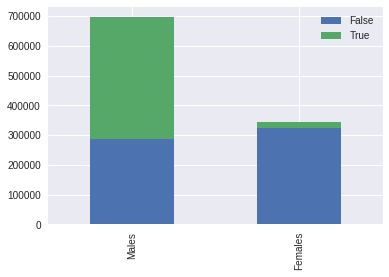

In [16]:
dmvc = datam.liked.value_counts()
dfvc = dataf.liked.value_counts()
df = pd.DataFrame([dmvc,dfvc])
df.index = ['Males','Females']
df.plot(kind='bar', stacked=True);

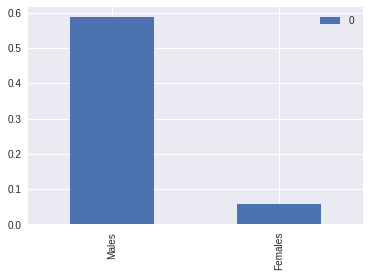

In [17]:
dmm = datam.liked.mean()
dfm = dataf.liked.mean()
df = pd.DataFrame([dmm,dfm])
df.index = ['Males','Females']
df.plot(kind='bar', stacked=True);

In [18]:
print " True  liked values - Males-  {} ({:.2%})".format(datam.liked.sum(), datam.liked.mean())
print " True  liked values - Females-  {} ({:.2%})".format(dataf.liked.sum(), dataf.liked.mean())


 True  liked values - Males-  408099 (58.65%)
 True  liked values - Females-  19791 (5.74%)


**Save** now , and let the analysis continue on separate data sets.

In [19]:
datam.to_csv("1M-datam.csv", index=False)
dataf.to_csv("1M-dataf.csv", index=False)

Males like 58.65% of the profiles shown to them, whereas females like only 5.7%. Even less than **one-tenth** compared to males.